In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
# Reading the file
### Busiest day consumption for other futures
l_BM_variables = pd.read_csv(r'../../results/lowcap-BM-optimized-variables-aggregated-with-replacement-40percentBEBcharging-ContiniuedTo2040.csv')
m_BM_variables = pd.read_csv(r'../../results/midcap-BM-optimized-variables-aggregated-with-replacement-40percentBEBcharging-ContiniuedTo2040.csv')
h_BM_variables = pd.read_csv(r'../../results/highcap-BM-optimized-variables-aggregated-with-replacement-40percentBEBcharging-ContiniuedTo2040.csv')
l_FE_variables = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-aggregated-with-replacement-40percentBEBcharging-ContiniuedTo2040.csv')
m_FE_variables = pd.read_csv(r'../../results/midcap-FE-optimized-variables-aggregated-with-replacement-40percentBEBcharging-ContiniuedTo2040.csv')
h_FE_variables = pd.read_csv(r'../../results/highcap-FE-optimized-variables-aggregated-with-replacement-40percentBEBcharging-ContiniuedTo2040.csv')
l_FH_variables = pd.read_csv(r'../../results/lowcap-FH-optimized-variables-aggregated-with-replacement-ContiniuedTo2040.csv')
m_FH_variables = pd.read_csv(r'../../results/midcap-FH-optimized-variables-aggregated-with-replacement-ContiniuedTo2040.csv')
h_FH_variables = pd.read_csv(r'../../results/highcap-FH-optimized-variables-aggregated-with-replacement-ContiniuedTo2040.csv')

In [52]:
# Read the energy of trips operated all by BEBs
trip_info = pd.read_csv(r'../../results/busiest-day-trips-info.csv')

In [53]:
# Step 1: Extract the TripKey from the 'Variable' column in h_FH_variables
l_BM_variables['TripKey'] = l_BM_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
m_BM_variables['TripKey'] = m_BM_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
h_BM_variables['TripKey'] = h_BM_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
l_FE_variables['TripKey'] = l_FE_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
m_FE_variables['TripKey'] = m_FE_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
h_FE_variables['TripKey'] = h_FE_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
l_FH_variables['TripKey'] = l_FH_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
m_FH_variables['TripKey'] = m_FH_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
h_FH_variables['TripKey'] = h_FH_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)

In [54]:
# Step 2: Map the 'Energy' column from trip_info to h_FH_variables based on 'TripKey'
l_BM_variables['Energy'] = l_BM_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
m_BM_variables['Energy'] = m_BM_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
h_BM_variables['Energy'] = h_BM_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
l_FE_variables['Energy'] = l_FE_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
m_FE_variables['Energy'] = m_FE_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
h_FE_variables['Energy'] = h_FE_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
l_FH_variables['Energy'] = l_FH_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
m_FH_variables['Energy'] = m_FH_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
h_FH_variables['Energy'] = h_FH_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])

In [55]:
### Filter to keep only rows with the "Value" (assignment) column equal to one
l_BM_variables = l_BM_variables[l_BM_variables['Value'] == 1]
m_BM_variables = m_BM_variables[m_BM_variables['Value'] == 1]
h_BM_variables = h_BM_variables[h_BM_variables['Value'] == 1]
l_FE_variables = l_FE_variables[l_FE_variables['Value'] == 1]
m_FE_variables = m_FE_variables[m_FE_variables['Value'] == 1]
h_FE_variables = h_FE_variables[h_FE_variables['Value'] == 1]
l_FH_variables = l_FH_variables[l_FH_variables['Value'] == 1]
m_FH_variables = m_FH_variables[m_FH_variables['Value'] == 1]
h_FH_variables = h_FH_variables[h_FH_variables['Value'] == 1]

In [56]:
### Calculate "busiest day energy" column
l_BM_variables['busiest day gallons'] = l_BM_variables['Value'] * l_BM_variables['Coefficient']
m_BM_variables['busiest day gallons'] = m_BM_variables['Value'] * m_BM_variables['Coefficient']
h_BM_variables['busiest day gallons'] = h_BM_variables['Value'] * h_BM_variables['Coefficient']
l_FE_variables['busiest day gallons'] = l_FE_variables['Value'] * l_FE_variables['Coefficient']
m_FE_variables['busiest day gallons'] = m_FE_variables['Value'] * m_FE_variables['Coefficient']
h_FE_variables['busiest day gallons'] = h_FE_variables['Value'] * h_FE_variables['Coefficient']
l_FH_variables['busiest day gallons'] = l_FH_variables['Value'] * l_FH_variables['Coefficient']
m_FH_variables['busiest day gallons'] = m_FH_variables['Value'] * m_FH_variables['Coefficient']
h_FH_variables['busiest day gallons'] = h_FH_variables['Value'] * h_FH_variables['Coefficient']

In [57]:
# Create a dictionary to store all dataframes with their respective names
dfs = {
    'l_BM': l_BM_variables,
    'm_BM': m_BM_variables,
    'h_BM': h_BM_variables,
    'l_FE': l_FE_variables,
    'm_FE': m_FE_variables,
    'h_FE': h_FE_variables,
    'l_FH': l_FH_variables,
    'm_FH': m_FH_variables,
    'h_FH': h_FH_variables,
}

# Initialize an empty list to store the dataframes with the new column
list_of_dfs = []

for future, df in dfs.items():
    # Add a new column with the name of the dataframe (future)
    df['future'] = future
    # Select the relevant columns
    df = df[['future', 'Year', 'Powertrain', 'dist', 'busiest day gallons', 'Energy']]
    # Append to the list
    list_of_dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

combined_df

future  Year Powertrain      dist  busiest day gallons     Energy
0        l_BM     0        CDB  3.527633             0.247132   1.676845
1        l_BM     0        CDB  6.489336             1.558568   9.951124
2        l_BM     0        CDB  6.489336             1.611629  11.354240
3        l_BM     0        CDB  3.527633             0.245797   2.015950
4        l_BM     0        CDB  6.489336             1.596454  10.666283
...       ...   ...        ...       ...                  ...        ...
383287   h_FH    17        BEB  5.674533             0.000000   9.710842
383288   h_FH    17        BEB  4.907396             0.000000   3.455277
383289   h_FH    17        BEB  5.904790             0.000000   7.910332
383290   h_FH    17        BEB  5.847957             0.000000   9.542812
383291   h_FH    17        BEB  5.847957             0.000000   8.419038

[383292 rows x 6 columns]

In [58]:
# Group by 'future', 'Year', and 'Powertrain' and aggregate the 'dist' column
result_df = combined_df.groupby(['future', 'Year', 'Powertrain'])[['dist', 'busiest day gallons', 'Energy']].sum().reset_index()

# Display the result
result_df

future  Year Powertrain          dist  busiest day gallons        Energy
0     h_BM     0        BEB    899.962158             0.000000   1589.104084
1     h_BM     0        CDB   8141.063040          1738.439245   9440.530799
2     h_BM     0        HEB   3499.863788           770.727189   4181.721929
3     h_BM     1        BEB   1034.975071             0.000000   1840.093032
4     h_BM     1        CDB   5106.008601           968.605746   5848.649471
..     ...   ...        ...           ...                  ...           ...
410   m_FH    15        HEB  11865.902397          2116.836577  13967.752032
411   m_FH    16        BEB    674.986589             0.000000   1243.604780
412   m_FH    16        HEB  11865.902397          2116.836577  13967.752032
413   m_FH    17        BEB    674.986589             0.000000   1243.604780
414   m_FH    17        HEB  11865.902397          2116.836577  13967.752032

[415 rows x 6 columns]

In [59]:
### Add one to years and then replace year 0 with the info from SQ
result_df['Year']=result_df['Year']+1
result_df

future  Year Powertrain          dist  busiest day gallons        Energy
0     h_BM     1        BEB    899.962158             0.000000   1589.104084
1     h_BM     1        CDB   8141.063040          1738.439245   9440.530799
2     h_BM     1        HEB   3499.863788           770.727189   4181.721929
3     h_BM     2        BEB   1034.975071             0.000000   1840.093032
4     h_BM     2        CDB   5106.008601           968.605746   5848.649471
..     ...   ...        ...           ...                  ...           ...
410   m_FH    16        HEB  11865.902397          2116.836577  13967.752032
411   m_FH    17        BEB    674.986589             0.000000   1243.604780
412   m_FH    17        HEB  11865.902397          2116.836577  13967.752032
413   m_FH    18        BEB    674.986589             0.000000   1243.604780
414   m_FH    18        HEB  11865.902397          2116.836577  13967.752032

[415 rows x 6 columns]

In [60]:
SQ = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-12212023.csv', low_memory=False)

In [61]:
total_energy_electric = SQ[SQ['Powertrain'] == 'electric']['Energy'].sum()
total_energy_electric

169141.58103750064

In [62]:
### Scale up the busiest day travelled distance to the whole year

### Read the ratios required for scaling up the busiest day results
ratios = pd.read_csv(r'../../results/diesel-consumption-distribution-compared-to-busiest-day.csv', low_memory=False)

# Sum the DieselRatio to get the total yearly scaling factor
total_yearly_ratio = ratios['DieselRatio'].sum()

# Scale up the dist values in result_df to the whole year
result_df['dist_scaled'] = result_df['dist'] * total_yearly_ratio
result_df['gallon_scaled'] = result_df['busiest day gallons'] * total_yearly_ratio
result_df['kwh_scaled'] = result_df['Energy'] * total_yearly_ratio


# Display the updated DataFrame
result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     1        BEB    899.962158             0.000000   1589.104084   
1     h_BM     1        CDB   8141.063040          1738.439245   9440.530799   
2     h_BM     1        HEB   3499.863788           770.727189   4181.721929   
3     h_BM     2        BEB   1034.975071             0.000000   1840.093032   
4     h_BM     2        CDB   5106.008601           968.605746   5848.649471   
..     ...   ...        ...           ...                  ...           ...   
410   m_FH    16        HEB  11865.902397          2116.836577  13967.752032   
411   m_FH    17        BEB    674.986589             0.000000   1243.604780   
412   m_FH    17        HEB  11865.902397          2116.836577  13967.752032   
413   m_FH    18        BEB    674.986589             0.000000   1243.604780   
414   m_FH    18        HEB  11865.902397          2116.836577  13967.752032   

      dist_scaled  gallon_scaled    kwh_scaled  
0    2.324739e+05       0.000000  4.104897e+05  
1    2.102960e+06  449065.271698  2.438633e+06  
2    9.040680e+05  199090.543661  1.080202e+06  
3    2.673498e+05       0.000000  4.753240e+05  
4    1.318960e+06  250205.581639  1.510795e+06  
..            ...            ...           ...  
410  3.065143e+06  546811.052051  3.608083e+06  
411  1.743593e+05       0.000000  3.212420e+05  
412  3.065143e+06  546811.052051  3.608083e+06  
413  1.743593e+05       0.000000  3.212420e+05  
414  3.065143e+06  546811.052051  3.608083e+06  

[415 rows x 9 columns]

In [63]:
# Create the new rows for each unique 'future'
new_rows = []
unique_futures = result_df['future'].unique()

for future in unique_futures:
    new_rows.extend([
        {'future': future, 'Year': 0, 'Powertrain': 'BEB', 'dist': 0, 'busiest day gallons': 0, 'Energy': 0, 'dist_scaled': 0, 'gallon_scaled': 0, 'kwh_scaled': 169141.6},
        {'future': future, 'Year': 0, 'Powertrain': 'HEB', 'dist': 0, 'busiest day gallons': 0, 'Energy': 0, 'dist_scaled': 0, 'gallon_scaled': 0, 'kwh_scaled': 0},
        {'future': future, 'Year': 0, 'Powertrain': 'CDB', 'dist': 0, 'busiest day gallons': 0, 'Energy': 0, 'dist_scaled': 0, 'gallon_scaled': 707460.7, 'kwh_scaled': 0}
    ])

# Convert the new rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append the new rows to the original DataFrame
result_df = pd.concat([result_df, new_rows_df], ignore_index=True)

# Sort the DataFrame by 'future' and 'Year' for better readability
result_df = result_df.sort_values(by=['future', 'Year']).reset_index(drop=True)
result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.962158             0.000000   1589.104084   
4     h_BM     1        CDB   8141.063040          1738.439245   9440.530799   
..     ...   ...        ...           ...                  ...           ...   
437   m_FH    16        HEB  11865.902397          2116.836577  13967.752032   
438   m_FH    17        BEB    674.986589             0.000000   1243.604780   
439   m_FH    17        HEB  11865.902397          2116.836577  13967.752032   
440   m_FH    18        BEB    674.986589             0.000000   1243.604780   
441   m_FH    18        HEB  11865.902397          2116.836577  13967.752032   

      dist_scaled  gallon_scaled    kwh_scaled  
0    0.000000e+00       0.000000  1.691416e+05  
1    0.000000e+00       0.000000  0.000000e+00  
2    0.000000e+00  707460.700000  0.000000e+00  
3    2.324739e+05       0.000000  4.104897e+05  
4    2.102960e+06  449065.271698  2.438633e+06  
..            ...            ...           ...  
437  3.065143e+06  546811.052051  3.608083e+06  
438  1.743593e+05       0.000000  3.212420e+05  
439  3.065143e+06  546811.052051  3.608083e+06  
440  1.743593e+05       0.000000  3.212420e+05  
441  3.065143e+06  546811.052051  3.608083e+06  

[442 rows x 9 columns]

# Estimate operation costs (gallons and kwh) using the energy model output 
### Price of each gallons of diesel: $3.6/gallon; Source: https://www.eia.gov/petroleum/gasdiesel/


### Price of each kwh: $0.11/kWh; Source: https://ww2.arb.ca.gov/sites/default/files/2022-06/ratesanddemand_ADA.pdf

In [64]:
# Create the 'operating_cost' column based on the conditions
result_df['operating_cost'] = np.where(
    result_df['Powertrain'] == 'BEB', 
    result_df['kwh_scaled'] * 0.11, 
    np.where(result_df['Powertrain'].isin(['HEB', 'CDB']), 
             result_df['gallon_scaled'] * 3.6, 
             0)  # Default value if no conditions are met
)

result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.962158             0.000000   1589.104084   
4     h_BM     1        CDB   8141.063040          1738.439245   9440.530799   
..     ...   ...        ...           ...                  ...           ...   
437   m_FH    16        HEB  11865.902397          2116.836577  13967.752032   
438   m_FH    17        BEB    674.986589             0.000000   1243.604780   
439   m_FH    17        HEB  11865.902397          2116.836577  13967.752032   
440   m_FH    18        BEB    674.986589             0.000000   1243.604780   
441   m_FH    18        HEB  11865.902397          2116.836577  13967.752032   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04  
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00  
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06  
3    2.324739e+05       0.000000  4.104897e+05    4.515387e+04  
4    2.102960e+06  449065.271698  2.438633e+06    1.616635e+06  
..            ...            ...           ...             ...  
437  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06  
438  1.743593e+05       0.000000  3.212420e+05    3.533662e+04  
439  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06  
440  1.743593e+05       0.000000  3.212420e+05    3.533662e+04  
441  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06  

[442 rows x 10 columns]

# Estimate maintenance costs
### Based on the following paper:
### https://www.sciencedirect.com/science/article/pii/S1361920923000457
### maintenance costs (C_mnt_{i,j,k} in USD/mi) for CDB: 1.09, for HEB: 1.10, for BEB: 1.06
### Regular maintenance midlife costs (C_mid_{i,j,k} in USD after 7 years) for CDB: 30000, for HEB: 30000, for BEB: 65000

In [65]:
maintenance_costs = {
    'CDB': 1.09,
    'HEB': 1.10,
    'BEB': 1.06
}
result_df['maintenance_cost'] = result_df.apply(lambda row: row['dist_scaled'] * maintenance_costs[row['Powertrain']], axis=1)

In [66]:
### Read fleet data
fleets = pd.read_csv(r'../../results/futures-fleet-data-ContiniuedTo2040.csv')
fleets

Powertrain  Value  Year  Strategy Scenario
0          CDB    141     0    Hybrid   lo-cap
1          CDB    119     1    Hybrid   lo-cap
2          CDB    106     2    Hybrid   lo-cap
3          CDB     93     3    Hybrid   lo-cap
4          CDB     80     4    Hybrid   lo-cap
..         ...    ...   ...       ...      ...
508        BEB    234    14  Electric   hi-cap
509        BEB    257    15  Electric   hi-cap
510        BEB    279    16  Electric   hi-cap
511        BEB    279    17  Electric   hi-cap
512        BEB    279    18  Electric   hi-cap

[513 rows x 5 columns]

In [67]:
result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.962158             0.000000   1589.104084   
4     h_BM     1        CDB   8141.063040          1738.439245   9440.530799   
..     ...   ...        ...           ...                  ...           ...   
437   m_FH    16        HEB  11865.902397          2116.836577  13967.752032   
438   m_FH    17        BEB    674.986589             0.000000   1243.604780   
439   m_FH    17        HEB  11865.902397          2116.836577  13967.752032   
440   m_FH    18        BEB    674.986589             0.000000   1243.604780   
441   m_FH    18        HEB  11865.902397          2116.836577  13967.752032   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3    2.324739e+05       0.000000  4.104897e+05    4.515387e+04   
4    2.102960e+06  449065.271698  2.438633e+06    1.616635e+06   
..            ...            ...           ...             ...   
437  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06   
438  1.743593e+05       0.000000  3.212420e+05    3.533662e+04   
439  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06   
440  1.743593e+05       0.000000  3.212420e+05    3.533662e+04   
441  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06   

     maintenance_cost  
0        0.000000e+00  
1        0.000000e+00  
2        0.000000e+00  
3        2.464223e+05  
4        2.292227e+06  
..                ...  
437      3.371657e+06  
438      1.848208e+05  
439      3.371657e+06  
440      1.848208e+05  
441      3.371657e+06  

[442 rows x 11 columns]

In [68]:
# Creating the mapping for 'future' column based on 'Strategy' and 'Scenario' from 'fleets'
mapping = {
    ('Electric', 'hi-cap'): 'h_FE',
    ('Electric', 'mid-cap'): 'm_FE',
    ('Electric', 'lo-cap'): 'l_FE',
    ('Hybrid', 'hi-cap'): 'h_FH',
    ('Hybrid', 'mid-cap'): 'm_FH',
    ('Hybrid', 'lo-cap'): 'l_FH',
    ('Hybrid Electric', 'hi-cap'): 'h_BM',
    ('Hybrid Electric', 'mid-cap'): 'm_BM',
    ('Hybrid Electric', 'lo-cap'): 'l_BM'
}

# Applying the mapping to create the 'future' column in 'fleets'
fleets['future'] = fleets.apply(lambda row: mapping[(row['Strategy'], row['Scenario'])], axis=1)

# Merging 'fleets' into 'result_df' based on 'future', 'Year', and 'Powertrain' columns to add the 'Value' as 'fleet'
result_df = result_df.merge(fleets[['future', 'Powertrain', 'Year', 'Value']], on=['future', 'Powertrain', 'Year'], how='left')

# Renaming the 'Value' column to 'fleet' in the result_df
result_df.rename(columns={'Value': 'fleet'}, inplace=True)

# Display the updated result_df to the user
result_df.head()

future  Year Powertrain         dist  busiest day gallons       Energy  \
0   h_BM     0        BEB     0.000000             0.000000     0.000000   
1   h_BM     0        HEB     0.000000             0.000000     0.000000   
2   h_BM     0        CDB     0.000000             0.000000     0.000000   
3   h_BM     1        BEB   899.962158             0.000000  1589.104084   
4   h_BM     1        CDB  8141.063040          1738.439245  9440.530799   

    dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0  0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1  0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2  0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3  2.324739e+05       0.000000  4.104897e+05    4.515387e+04   
4  2.102960e+06  449065.271698  2.438633e+06    1.616635e+06   

   maintenance_cost  fleet  
0      0.000000e+00     15  
1      0.000000e+00      9  
2      0.000000e+00    141  
3      2.464223e+05     20  
4      2.292227e+06     99

In [69]:
nan_fleet_rows = result_df[result_df['fleet'].isna()]
nan_fleet_rows

Empty DataFrame
Columns: [future, Year, Powertrain, dist, busiest day gallons, Energy, dist_scaled, gallon_scaled, kwh_scaled, operating_cost, maintenance_cost, fleet]
Index: []

In [70]:
### Add midlife costs to the maintenance_cost (break it down to yearly basis)

# Updating the 'maintenance_cost' column based on the given conditions for the rows where fleet is not NaN
result_df['maintenance_cost'] = result_df.apply(
    lambda row: (30000 * row['fleet'] if row['Powertrain'] in ['CDB', 'HEB'] else 65000 * row['fleet']) / 14, axis=1
)

result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.962158             0.000000   1589.104084   
4     h_BM     1        CDB   8141.063040          1738.439245   9440.530799   
..     ...   ...        ...           ...                  ...           ...   
437   m_FH    16        HEB  11865.902397          2116.836577  13967.752032   
438   m_FH    17        BEB    674.986589             0.000000   1243.604780   
439   m_FH    17        HEB  11865.902397          2116.836577  13967.752032   
440   m_FH    18        BEB    674.986589             0.000000   1243.604780   
441   m_FH    18        HEB  11865.902397          2116.836577  13967.752032   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3    2.324739e+05       0.000000  4.104897e+05    4.515387e+04   
4    2.102960e+06  449065.271698  2.438633e+06    1.616635e+06   
..            ...            ...           ...             ...   
437  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06   
438  1.743593e+05       0.000000  3.212420e+05    3.533662e+04   
439  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06   
440  1.743593e+05       0.000000  3.212420e+05    3.533662e+04   
441  3.065143e+06  546811.052051  3.608083e+06    1.968520e+06   

     maintenance_cost  fleet  
0        69642.857143     15  
1        19285.714286      9  
2       302142.857143    141  
3        92857.142857     20  
4       212142.857143     99  
..                ...    ...  
437     255000.000000    119  
438      69642.857143     15  
439     255000.000000    119  
440      69642.857143     15  
441     255000.000000    119  

[442 rows x 12 columns]

In [71]:
result_df.loc[result_df['Year']==0]

future  Year Powertrain  dist  busiest day gallons  Energy  dist_scaled  \
0     h_BM     0        BEB   0.0                  0.0     0.0          0.0   
1     h_BM     0        HEB   0.0                  0.0     0.0          0.0   
2     h_BM     0        CDB   0.0                  0.0     0.0          0.0   
40    h_FE     0        BEB   0.0                  0.0     0.0          0.0   
41    h_FE     0        HEB   0.0                  0.0     0.0          0.0   
42    h_FE     0        CDB   0.0                  0.0     0.0          0.0   
91    h_FH     0        BEB   0.0                  0.0     0.0          0.0   
92    h_FH     0        HEB   0.0                  0.0     0.0          0.0   
93    h_FH     0        CDB   0.0                  0.0     0.0          0.0   
133   l_BM     0        BEB   0.0                  0.0     0.0          0.0   
134   l_BM     0        HEB   0.0                  0.0     0.0          0.0   
135   l_BM     0        CDB   0.0                  0.0     0.0          0.0   
190   l_FE     0        BEB   0.0                  0.0     0.0          0.0   
191   l_FE     0        HEB   0.0                  0.0     0.0          0.0   
192   l_FE     0        CDB   0.0                  0.0     0.0          0.0   
247   l_FH     0        BEB   0.0                  0.0     0.0          0.0   
248   l_FH     0        HEB   0.0                  0.0     0.0          0.0   
249   l_FH     0        CDB   0.0                  0.0     0.0          0.0   
295   m_BM     0        BEB   0.0                  0.0     0.0          0.0   
296   m_BM     0        HEB   0.0                  0.0     0.0          0.0   
297   m_BM     0        CDB   0.0                  0.0     0.0          0.0   
342   m_FE     0        BEB   0.0                  0.0     0.0          0.0   
343   m_FE     0        HEB   0.0                  0.0     0.0          0.0   
344   m_FE     0        CDB   0.0                  0.0     0.0          0.0   
399   m_FH     0        BEB   0.0                  0.0     0.0          0.0   
400   m_FH     0        HEB   0.0                  0.0     0.0          0.0   
401   m_FH     0        CDB   0.0                  0.0     0.0          0.0   

     gallon_scaled  kwh_scaled  operating_cost  maintenance_cost  fleet  
0              0.0    169141.6       18605.576      69642.857143     15  
1              0.0         0.0           0.000      19285.714286      9  
2         707460.7         0.0     2546858.520     302142.857143    141  
40             0.0    169141.6       18605.576      69642.857143     15  
41             0.0         0.0           0.000      19285.714286      9  
42        707460.7         0.0     2546858.520     302142.857143    141  
91             0.0    169141.6       18605.576      69642.857143     15  
92             0.0         0.0           0.000      19285.714286      9  
93        707460.7         0.0     2546858.520     302142.857143    141  
133            0.0    169141.6       18605.576      69642.857143     15  
134            0.0         0.0           0.000      19285.714286      9  
135       707460.7         0.0     2546858.520     302142.857143    141  
190            0.0    169141.6       18605.576      69642.857143     15  
191            0.0         0.0           0.000      19285.714286      9  
192       707460.7         0.0     2546858.520     302142.857143    141  
247            0.0    169141.6       18605.576      69642.857143     15  
248            0.0         0.0           0.000      19285.714286      9  
249       707460.7         0.0     2546858.520     302142.857143    141  
295            0.0    169141.6       18605.576      69642.857143     15  
296            0.0         0.0           0.000      19285.714286      9  
297       707460.7         0.0     2546858.520     302142.857143    141  
342            0.0    169141.6       18605.576      69642.857143     15  
343            0.0         0.0           0.000      19285.714286      9  
344       70746

In [72]:
# Creating the new rows for 'future' = 'SQ' for all years (0 to 13) for each Powertrain
new_rows = []

# Loop over the years and powertrains
for year in range(19):  # For years 0 through 18
    for powertrain in ['CDB', 'HEB', 'BEB']:  # For each Powertrain
        # Copy the row where future='h_BM' and Year=0 and Powertrain=powertrain
        copy_row = result_df[(result_df['future'] == 'h_BM') & (result_df['Year'] == 0) & (result_df['Powertrain'] == powertrain)].iloc[0].copy()
        
        # Modify the 'future' and 'Year' columns
        copy_row['future'] = 'SQ'
        copy_row['Year'] = year
        
        # Append the new row to the list
        new_rows.append(copy_row)

# Convert the new rows into a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append the new rows to result_df
result_df = pd.concat([result_df, new_rows_df], ignore_index=True)
result_df

future  Year Powertrain         dist  busiest day gallons       Energy  \
0     h_BM     0        BEB     0.000000             0.000000     0.000000   
1     h_BM     0        HEB     0.000000             0.000000     0.000000   
2     h_BM     0        CDB     0.000000             0.000000     0.000000   
3     h_BM     1        BEB   899.962158             0.000000  1589.104084   
4     h_BM     1        CDB  8141.063040          1738.439245  9440.530799   
..     ...   ...        ...          ...                  ...          ...   
494     SQ    17        HEB     0.000000             0.000000     0.000000   
495     SQ    17        BEB     0.000000             0.000000     0.000000   
496     SQ    18        CDB     0.000000             0.000000     0.000000   
497     SQ    18        HEB     0.000000             0.000000     0.000000   
498     SQ    18        BEB     0.000000             0.000000     0.000000   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3    2.324739e+05       0.000000  4.104897e+05    4.515387e+04   
4    2.102960e+06  449065.271698  2.438633e+06    1.616635e+06   
..            ...            ...           ...             ...   
494  0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
495  0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
496  0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
497  0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
498  0.000000e+00       0.000000  1.691416e+05    1.860558e+04   

     maintenance_cost  fleet  
0        69642.857143     15  
1        19285.714286      9  
2       302142.857143    141  
3        92857.142857     20  
4       212142.857143     99  
..                ...    ...  
494      19285.714286      9  
495      69642.857143     15  
496     302142.857143    141  
497      19285.714286      9  
498      69642.857143     15  

[499 rows x 12 columns]

In [73]:
# Define strategy names for renaming
strategy_names = {
    "SQ": "Status quo",
    "l_BM": "lo-cap Hybrid+Electric",
    "m_BM": "mid-cap Hybrid+Electric",
    "h_BM": "hi-cap Hybrid+Electric",
    "l_FE": "lo-cap Electric",
    "m_FE": "mid-cap Electric",
    "h_FE": "hi-cap Electric",
    "l_FH": "lo-cap Hybrid",
    "m_FH": "mid-cap Hybrid",
    "h_FH": "hi-cap Hybrid"
}

# Rename the 'future' column in result_df using the strategy_names dictionary
result_df['future'] = result_df['future'].map(strategy_names)
result_df

future  Year Powertrain         dist  \
0    hi-cap Hybrid+Electric     0        BEB     0.000000   
1    hi-cap Hybrid+Electric     0        HEB     0.000000   
2    hi-cap Hybrid+Electric     0        CDB     0.000000   
3    hi-cap Hybrid+Electric     1        BEB   899.962158   
4    hi-cap Hybrid+Electric     1        CDB  8141.063040   
..                      ...   ...        ...          ...   
494              Status quo    17        HEB     0.000000   
495              Status quo    17        BEB     0.000000   
496              Status quo    18        CDB     0.000000   
497              Status quo    18        HEB     0.000000   
498              Status quo    18        BEB     0.000000   

     busiest day gallons       Energy   dist_scaled  gallon_scaled  \
0               0.000000     0.000000  0.000000e+00       0.000000   
1               0.000000     0.000000  0.000000e+00       0.000000   
2               0.000000     0.000000  0.000000e+00  707460.700000   
3               0.000000  1589.104084  2.324739e+05       0.000000   
4            1738.439245  9440.530799  2.102960e+06  449065.271698   
..                   ...          ...           ...            ...   
494             0.000000     0.000000  0.000000e+00       0.000000   
495             0.000000     0.000000  0.000000e+00       0.000000   
496             0.000000     0.000000  0.000000e+00  707460.700000   
497             0.000000     0.000000  0.000000e+00       0.000000   
498             0.000000     0.000000  0.000000e+00       0.000000   

       kwh_scaled  operating_cost  maintenance_cost  fleet  
0    1.691416e+05    1.860558e+04      69642.857143     15  
1    0.000000e+00    0.000000e+00      19285.714286      9  
2    0.000000e+00    2.546859e+06     302142.857143    141  
3    4.104897e+05    4.515387e+04      92857.142857     20  
4    2.438633e+06    1.616635e+06     212142.857143     99  
..            ...             ...               ...    ...  
494  0.000000e+00    0.000000e+00      19285.714286      9  
495  1.691416e+05    1.860558e+04      69642.857143     15  
496  0.000000e+00    2.546859e+06     302142.857143    141  
497  0.000000e+00    0.000000e+00      19285.714286      9  
498  1.691416e+05    1.860558e+04      69642.857143     15  

[499 rows x 12 columns]

In [74]:
# Group the data by 'future' and 'Year', and calculate the total operating, maintenance, and fleet investment costs for each strategy
result_df = result_df.groupby(['future', 'Year']).agg({
    'operating_cost': 'sum',
    'maintenance_cost': 'sum',
}).reset_index()
result_df

future  Year  operating_cost  maintenance_cost
0                 Status quo     0    2.565464e+06      3.910714e+05
1                 Status quo     1    2.565464e+06      3.910714e+05
2                 Status quo     2    2.565464e+06      3.910714e+05
3                 Status quo     3    2.565464e+06      3.910714e+05
4                 Status quo     4    2.565464e+06      3.910714e+05
..                       ...   ...             ...               ...
185  mid-cap Hybrid+Electric    14    8.998302e+05      9.035714e+05
186  mid-cap Hybrid+Electric    15    8.178272e+05      9.582143e+05
187  mid-cap Hybrid+Electric    16    7.393462e+05      1.012857e+06
188  mid-cap Hybrid+Electric    17    6.644612e+05      1.067500e+06
189  mid-cap Hybrid+Electric    18    5.959061e+05      1.124286e+06

[190 rows x 4 columns]

### Integerate investments costs

In [75]:
### Read fleet data
investment = pd.read_csv(r'../../results/futures-investment-cost-data-ContiniuedTo2040.csv')
investment

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0    2022         15.0          9.0         0.0         0.0   
1    2023         23.0          9.0         8.0         0.0   
2    2024         23.0          9.0         0.0         0.0   
3    2025         27.0          9.0         4.0         0.0   
4    2026         38.0          9.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
185  2036          NaN          NaN         NaN         NaN   
186  2037          NaN          NaN         NaN         NaN   
187  2038          NaN          NaN         NaN         NaN   
188  2039          NaN          NaN         NaN         NaN   
189  2040          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)           future  \
0                           0.0                         0.0  hi-cap Electric   
1                          10.4                         0.0  hi-cap Electric   
2                           0.0                         0.0  hi-cap Electric   
3                           5.2                         0.0  hi-cap Electric   
4                          14.3                         0.0  hi-cap Electric   
..                          ...                         ...              ...   
185                         0.0                         0.0       Status quo   
186                         0.0                         0.0       Status quo   
187                         0.0                         0.0       Status quo   
188                         0.0                         0.0       Status quo   
189                         0.0                         0.0       Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                       0.0                        0.0         0.0   
3                       4.0                        0.0         5.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
185                     NaN                        1.2         1.2   
186                     NaN                        0.0         0.0   
187                     NaN                        0.0         0.0   
188                     NaN                        3.6         3.6   
189                     NaN                        2.0         2.0   

     conventional  electric  hybrid  cumulative_cost  
0             NaN       NaN     NaN              0.0  
1             NaN       NaN     NaN             10.4  
2             NaN       NaN     NaN             10.4  
3             NaN       NaN     NaN             15.6  
4             NaN       NaN     NaN             29.9  
..            ...       ...     ...              ...  
185           3.0       0.0     0.0             57.0  
186           0.0       0.0     0.0             57.0  
187           0.0       0.0     0.0             57.0  
188           9.0       0.0     0.0             60.6  
189           5.0       0.0     0.0             62.6  

[190 rows x 15 columns]

In [76]:
# Creating a dictionary for the mapping of Year values to the specified replacements
mapping = {
    2022: 0,
    2023: 1,
    2024: 2,
    2025: 3,
    2026: 4,
    2027: 5,
    2028: 6,
    2029: 7,
    2030: 8,
    2031: 9,
    2032: 10,
    2033: 11,
    2034: 12,
    2035: 13
}

# Replacing the values in the 'Year' column of the 'all_data' dataframe
investment['Year'] = investment['Year'].replace(mapping)
investment

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0       0         15.0          9.0         0.0         0.0   
1       1         23.0          9.0         8.0         0.0   
2       2         23.0          9.0         0.0         0.0   
3       3         27.0          9.0         4.0         0.0   
4       4         38.0          9.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
185  2036          NaN          NaN         NaN         NaN   
186  2037          NaN          NaN         NaN         NaN   
187  2038          NaN          NaN         NaN         NaN   
188  2039          NaN          NaN         NaN         NaN   
189  2040          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)           future  \
0                           0.0                         0.0  hi-cap Electric   
1                          10.4                         0.0  hi-cap Electric   
2                           0.0                         0.0  hi-cap Electric   
3                           5.2                         0.0  hi-cap Electric   
4                          14.3                         0.0  hi-cap Electric   
..                          ...                         ...              ...   
185                         0.0                         0.0       Status quo   
186                         0.0                         0.0       Status quo   
187                         0.0                         0.0       Status quo   
188                         0.0                         0.0       Status quo   
189                         0.0                         0.0       Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                       0.0                        0.0         0.0   
3                       4.0                        0.0         5.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
185                     NaN                        1.2         1.2   
186                     NaN                        0.0         0.0   
187                     NaN                        0.0         0.0   
188                     NaN                        3.6         3.6   
189                     NaN                        2.0         2.0   

     conventional  electric  hybrid  cumulative_cost  
0             NaN       NaN     NaN              0.0  
1             NaN       NaN     NaN             10.4  
2             NaN       NaN     NaN             10.4  
3             NaN       NaN     NaN             15.6  
4             NaN       NaN     NaN             29.9  
..            ...       ...     ...              ...  
185           3.0       0.0     0.0             57.0  
186           0.0       0.0     0.0             57.0  
187           0.0       0.0     0.0             57.0  
188           9.0       0.0     0.0             60.6  
189           5.0       0.0     0.0             62.6  

[190 rows x 15 columns]

In [77]:
# Creating a dictionary for the mapping of Year values to the specified replacements
mapping = {
    "lo-cap Hybrid Electric": "lo-cap Hybrid+Electric",
    "mid-cap Hybrid Electric": "mid-cap Hybrid+Electric",
    "hi-cap Hybrid Electric": "hi-cap Hybrid+Electric"
}

# Replacing the values in the 'Year' column of the 'all_data' dataframe
investment['future'] = investment['future'].replace(mapping)
investment

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0       0         15.0          9.0         0.0         0.0   
1       1         23.0          9.0         8.0         0.0   
2       2         23.0          9.0         0.0         0.0   
3       3         27.0          9.0         4.0         0.0   
4       4         38.0          9.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
185  2036          NaN          NaN         NaN         NaN   
186  2037          NaN          NaN         NaN         NaN   
187  2038          NaN          NaN         NaN         NaN   
188  2039          NaN          NaN         NaN         NaN   
189  2040          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)           future  \
0                           0.0                         0.0  hi-cap Electric   
1                          10.4                         0.0  hi-cap Electric   
2                           0.0                         0.0  hi-cap Electric   
3                           5.2                         0.0  hi-cap Electric   
4                          14.3                         0.0  hi-cap Electric   
..                          ...                         ...              ...   
185                         0.0                         0.0       Status quo   
186                         0.0                         0.0       Status quo   
187                         0.0                         0.0       Status quo   
188                         0.0                         0.0       Status quo   
189                         0.0                         0.0       Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                       0.0                        0.0         0.0   
3                       4.0                        0.0         5.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
185                     NaN                        1.2         1.2   
186                     NaN                        0.0         0.0   
187                     NaN                        0.0         0.0   
188                     NaN                        3.6         3.6   
189                     NaN                        2.0         2.0   

     conventional  electric  hybrid  cumulative_cost  
0             NaN       NaN     NaN              0.0  
1             NaN       NaN     NaN             10.4  
2             NaN       NaN     NaN             10.4  
3             NaN       NaN     NaN             15.6  
4             NaN       NaN     NaN             29.9  
..            ...       ...     ...              ...  
185           3.0       0.0     0.0             57.0  
186           0.0       0.0     0.0             57.0  
187           0.0       0.0     0.0             57.0  
188           9.0       0.0     0.0             60.6  
189           5.0       0.0     0.0             62.6  

[190 rows x 15 columns]

In [78]:
investment.loc[investment['future']=='hi-cap Hybrid+Electric']

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
114     0         15.0          9.0         0.0         0.0   
115     1         20.0         35.0         5.0        26.0   
116     2         23.0         64.0         3.0        29.0   
117     3         27.0         91.0         4.0        27.0   
118     4         38.0        108.0        11.0        17.0   
119     5         42.0        107.0         4.0         0.0   
120     6         52.0        103.0        10.0         0.0   
121     7         73.0         93.0        21.0         0.0   
122     8         96.0         83.0        23.0         0.0   
123     9        119.0         72.0        23.0         0.0   
124    10        142.0         62.0        23.0         0.0   
125    11        165.0         52.0        23.0         0.0   
126    12        188.0         41.0        23.0         0.0   
127    13        211.0         31.0        23.0         0.0   
128  2036        234.0         21.0        23.0         0.0   
129  2037        257.0         10.0        23.0         0.0   
130  2038        279.0          0.0        22.0         0.0   
131  2039        279.0          0.0         0.0         0.0   
132  2040        279.0          0.0         0.0         0.0   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  \
114                         0.0                         0.0   
115                         6.5                        23.4   
116                         3.9                        26.1   
117                         5.2                        24.3   
118                        14.3                        15.3   
119                         5.2                         0.0   
120                        13.0                         0.0   
121                        27.3                         0.0   
122                        29.9                         0.0   
123                        29.9                         0.0   
124                        29.9                         0.0   
125                        29.9                         0.0   
126                        29.9                         0.0   
127                        29.9                         0.0   
128                        29.9                         0.0   
129                        29.9                         0.0   
130                        28.6                         0.0   
131                         0.0                         0.0   
132                         0.0                         0.0   

                     future  yearly_purchased_buses  \
114  hi-cap Hybrid+Electric                     0.0   
115  hi-cap Hybrid+Electric                    31.0   
116  hi-cap Hybrid+Electric                    32.0   
117  hi-cap Hybrid+Electric                    31.0   
118  hi-cap Hybrid+Electric                    28.0   
119  hi-cap Hybrid+Electric                     4.0   
120  hi-cap Hybrid+Electric                    10.0   
121  hi-cap Hybrid+Electric                    21.0   
122  hi-cap Hybrid+Electric                    23.0   
123  hi-cap Hybrid+Electric                    23.0   
124  hi-cap Hybrid+Electric                    23.0   
125  hi-cap Hybrid+Electric                    23.0   
126  hi-cap Hybrid+Electric                    23.0   
127  hi-cap Hybrid+Electric                    23.0   
128  hi-cap Hybrid+Electric                    23.0   
129  hi-cap Hybrid+Electric                    23.0   
130  hi-cap Hybrid+Electric                    22.0   
131  hi-cap Hybrid+Electric                     0.0   
132  hi-cap Hybrid+Electric                     0.0   

     CDB- Investment Cost (M$)  total_cost  conventional  electric  hybrid  \
114                        0.0         0.0           NaN       NaN     NaN   
115                        0.0        29.9           NaN       NaN     NaN   
116                        0.0        30.0           NaN       NaN     NaN   
117                        0.0        29.5           NaN       NaN    

In [79]:
# Merge cumulative_cost from investment to result_df based on 'future' and 'Year'
result_df = result_df.merge(investment[['future', 'Year', 'total_cost']],
                            on=['future', 'Year'],
                            how='left')

# Rename the 'cumulative_cost' column to 'fleet_investment'
result_df = result_df.rename(columns={'total_cost': 'fleet_investment'})

result_df

future  Year  operating_cost  maintenance_cost  \
0                 Status quo     0    2.565464e+06      3.910714e+05   
1                 Status quo     1    2.565464e+06      3.910714e+05   
2                 Status quo     2    2.565464e+06      3.910714e+05   
3                 Status quo     3    2.565464e+06      3.910714e+05   
4                 Status quo     4    2.565464e+06      3.910714e+05   
..                       ...   ...             ...               ...   
185  mid-cap Hybrid+Electric    14    8.998302e+05      9.035714e+05   
186  mid-cap Hybrid+Electric    15    8.178272e+05      9.582143e+05   
187  mid-cap Hybrid+Electric    16    7.393462e+05      1.012857e+06   
188  mid-cap Hybrid+Electric    17    6.644612e+05      1.067500e+06   
189  mid-cap Hybrid+Electric    18    5.959061e+05      1.124286e+06   

     fleet_investment  
0                 0.0  
1                 3.6  
2                 2.0  
3                 8.4  
4                 8.8  
..                ...  
185               NaN  
186               NaN  
187               NaN  
188               NaN  
189               NaN  

[190 rows x 5 columns]

In [80]:
result_df.loc[result_df['future']=='hi-cap Hybrid+Electric']

future  Year  operating_cost  maintenance_cost  \
57  hi-cap Hybrid+Electric     0    2.565464e+06      3.910714e+05   
58  hi-cap Hybrid+Electric     1    2.378515e+06      3.800000e+05   
59  hi-cap Hybrid+Electric     2    2.161288e+06      3.767857e+05   
60  hi-cap Hybrid+Electric     3    1.974276e+06      3.782143e+05   
61  hi-cap Hybrid+Electric     4    1.803902e+06      4.100000e+05   
62  hi-cap Hybrid+Electric     5    1.770486e+06      4.242857e+05   
63  hi-cap Hybrid+Electric     6    1.693998e+06      4.621429e+05   
64  hi-cap Hybrid+Electric     7    1.539547e+06      5.382143e+05   
65  hi-cap Hybrid+Electric     8    1.381091e+06      6.235714e+05   
66  hi-cap Hybrid+Electric     9    1.226188e+06      7.067857e+05   
67  hi-cap Hybrid+Electric    10    1.078094e+06      7.921429e+05   
68  hi-cap Hybrid+Electric    11    9.394036e+05      8.775000e+05   
69  hi-cap Hybrid+Electric    12    8.123552e+05      9.607143e+05   
70  hi-cap Hybrid+Electric    13    6.935767e+05      1.046071e+06   
71  hi-cap Hybrid+Electric    14    5.865692e+05      1.131429e+06   
72  hi-cap Hybrid+Electric    15    4.931550e+05      1.214643e+06   
73  hi-cap Hybrid+Electric    16    4.322257e+05      1.295357e+06   
74  hi-cap Hybrid+Electric    17    4.322257e+05      1.295357e+06   
75  hi-cap Hybrid+Electric    18    4.322257e+05      1.295357e+06   

    fleet_investment  
57               0.0  
58              29.9  
59              30.0  
60              29.5  
61              29.6  
62               5.2  
63              13.0  
64              27.3  
65              29.9  
66              29.9  
67              29.9  
68              29.9  
69              29.9  
70              29.9  
71               NaN  
72               NaN  
73               NaN  
74               NaN  
75               NaN

In [81]:
result_df.loc[result_df['future']=='status quo']

Empty DataFrame
Columns: [future, Year, operating_cost, maintenance_cost, fleet_investment]
Index: []

In [82]:
# Define the custom color palette with the new strategy names
custom_palette = {
    "Status quo": "red",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    #"hi-cap Hybrid": "mediumblue",
    "lo-cap Hybrid+Electric": "plum",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

# Group the data by 'future' and calculate the total operating and maintenance costs for each strategy
grouped_df = result_df.groupby('future').agg({
    'operating_cost': 'sum',
    'maintenance_cost': 'sum',
    'fleet_investment': 'sum'
}).reset_index()

# Convert costs to millions
grouped_df['operating_cost'] = grouped_df['operating_cost'] / 1e6
grouped_df['maintenance_cost'] = grouped_df['maintenance_cost'] / 1e6

# Set the positions and width for the bars
positions = np.arange(len(grouped_df))
bar_width = 0.4

# Create the plot
plt.figure(figsize=(25, 10), dpi=400)

# Plot the operating costs
plt.bar(positions, grouped_df['fleet_investment'], color=[custom_palette[future] for future in grouped_df['future']], 
        label='Fleet investment cost', width=bar_width, hatch='//')

plt.bar(positions, grouped_df['operating_cost'], bottom=grouped_df['fleet_investment'], color=[custom_palette[future] for future in grouped_df['future']], 
        label='Operating cost', width=bar_width, hatch='.')

# Plot the maintenance costs
plt.bar(positions, grouped_df['maintenance_cost'], bottom=grouped_df['operating_cost']+grouped_df['fleet_investment'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Maintenance cost', width=bar_width, hatch='*')

# Add titles and labels
plt.xlabel('Future', fontsize=28)
plt.ylabel('Costs (Million USD)', fontsize=28)
#plt.title('Total Operating and Maintenance Costs by Strategy', fontsize=32)
plt.xticks(positions, grouped_df['future'], fontsize=26, rotation=45)
plt.yticks(fontsize=26)

# Format y-axis to show values in million USD
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend
plt.legend(title='Cost Components', fontsize=26, title_fontsize=30, loc='upper left')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy.png', dpi=400)
plt.show()


In [83]:
from matplotlib.patches import Patch

# Sort the grouped_df by total cost (operating + maintenance) in descending order
grouped_df['total_cost'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['fleet_investment']
grouped_df = grouped_df.sort_values(by='total_cost', ascending=False).reset_index(drop=True)

# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_width = 0.4

# Create the plot
plt.figure(figsize=(20, 10), dpi=400)

# Plot the fleet investment costs with white hatches
plt.bar(positions, grouped_df['fleet_investment'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Fleet investment Cost', width=bar_width, hatch='//', edgecolor='white')

# Plot the operating costs with white hatches
plt.bar(positions, grouped_df['operating_cost'], 
        bottom=grouped_df['fleet_investment'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Operating Cost', width=bar_width, hatch='+', edgecolor='white')

# Plot the maintenance costs with white hatches
plt.bar(positions, grouped_df['maintenance_cost'], 
        bottom=grouped_df['fleet_investment'] + grouped_df['operating_cost'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Maintenance Cost', width=bar_width, hatch='.', edgecolor='white')

# Add titles and labels
plt.xlabel('Future', fontsize=26)
plt.ylabel('Costs (Million USD)', fontsize=24)

# Update plt.xticks to improve label alignment
plt.xticks(positions, grouped_df['future'], fontsize=20, rotation=45, ha='right')

plt.yticks(fontsize=18)

# Format y-axis to show values in million USD
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='//', label='Fleet investment cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='+', label='Operating cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='.', label='Maintenance cost')]

plt.legend(handles=legend_elements, title='', fontsize=20, title_fontsize=26, loc='upper right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy.png', dpi=400)
plt.show()


In [84]:
# Sort the grouped_df by total cost (operating + maintenance + fleet investment) in descending order
grouped_df['total_cost'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['fleet_investment']
grouped_df = grouped_df.sort_values(by='total_cost', ascending=False).reset_index(drop=True)

# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_height = 0.4

# Create the plot
plt.figure(figsize=(15, 7), dpi=400)

# Plot the fleet investment costs with white hatches (horizontal bars)
plt.barh(positions, grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Fleet investment Cost', height=bar_height, hatch='//', edgecolor='white')

# Plot the operating costs with white hatches (stacked on top of fleet investment)
plt.barh(positions, grouped_df['operating_cost'], 
         left=grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Operating Cost', height=bar_height, hatch='+', edgecolor='white')

# Plot the maintenance costs with white hatches (stacked on top of fleet investment and operating)
plt.barh(positions, grouped_df['maintenance_cost'], 
         left=grouped_df['fleet_investment'] + grouped_df['operating_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Maintenance Cost', height=bar_height, hatch='.', edgecolor='white')

# Add titles and labels
plt.ylabel('Future', fontsize=16)  # 'Future' categories are now along the y-axis
plt.xlabel('Costs (Million USD)', fontsize=16)

# Update plt.yticks to improve label alignment for the categories
plt.yticks(positions, grouped_df['future'], fontsize=14)
plt.xticks(fontsize=14)

# Format x-axis to show values in million USD
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in the legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='//', label='Fleet investment cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='+', label='Operating cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='.', label='Maintenance cost')]

plt.legend(handles=legend_elements, title='', fontsize=16, title_fontsize=26, loc='upper right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy-horizontal.png', dpi=400)
plt.show()


In [85]:
# Save to CSV in a local directory (adjust path as per your environment)
csv_path = r'../../results/futures-allcosts-data-ContiniuedTo2040.csv'

# Saving the DataFrame as a CSV file
result_df.to_csv(csv_path, index=False)

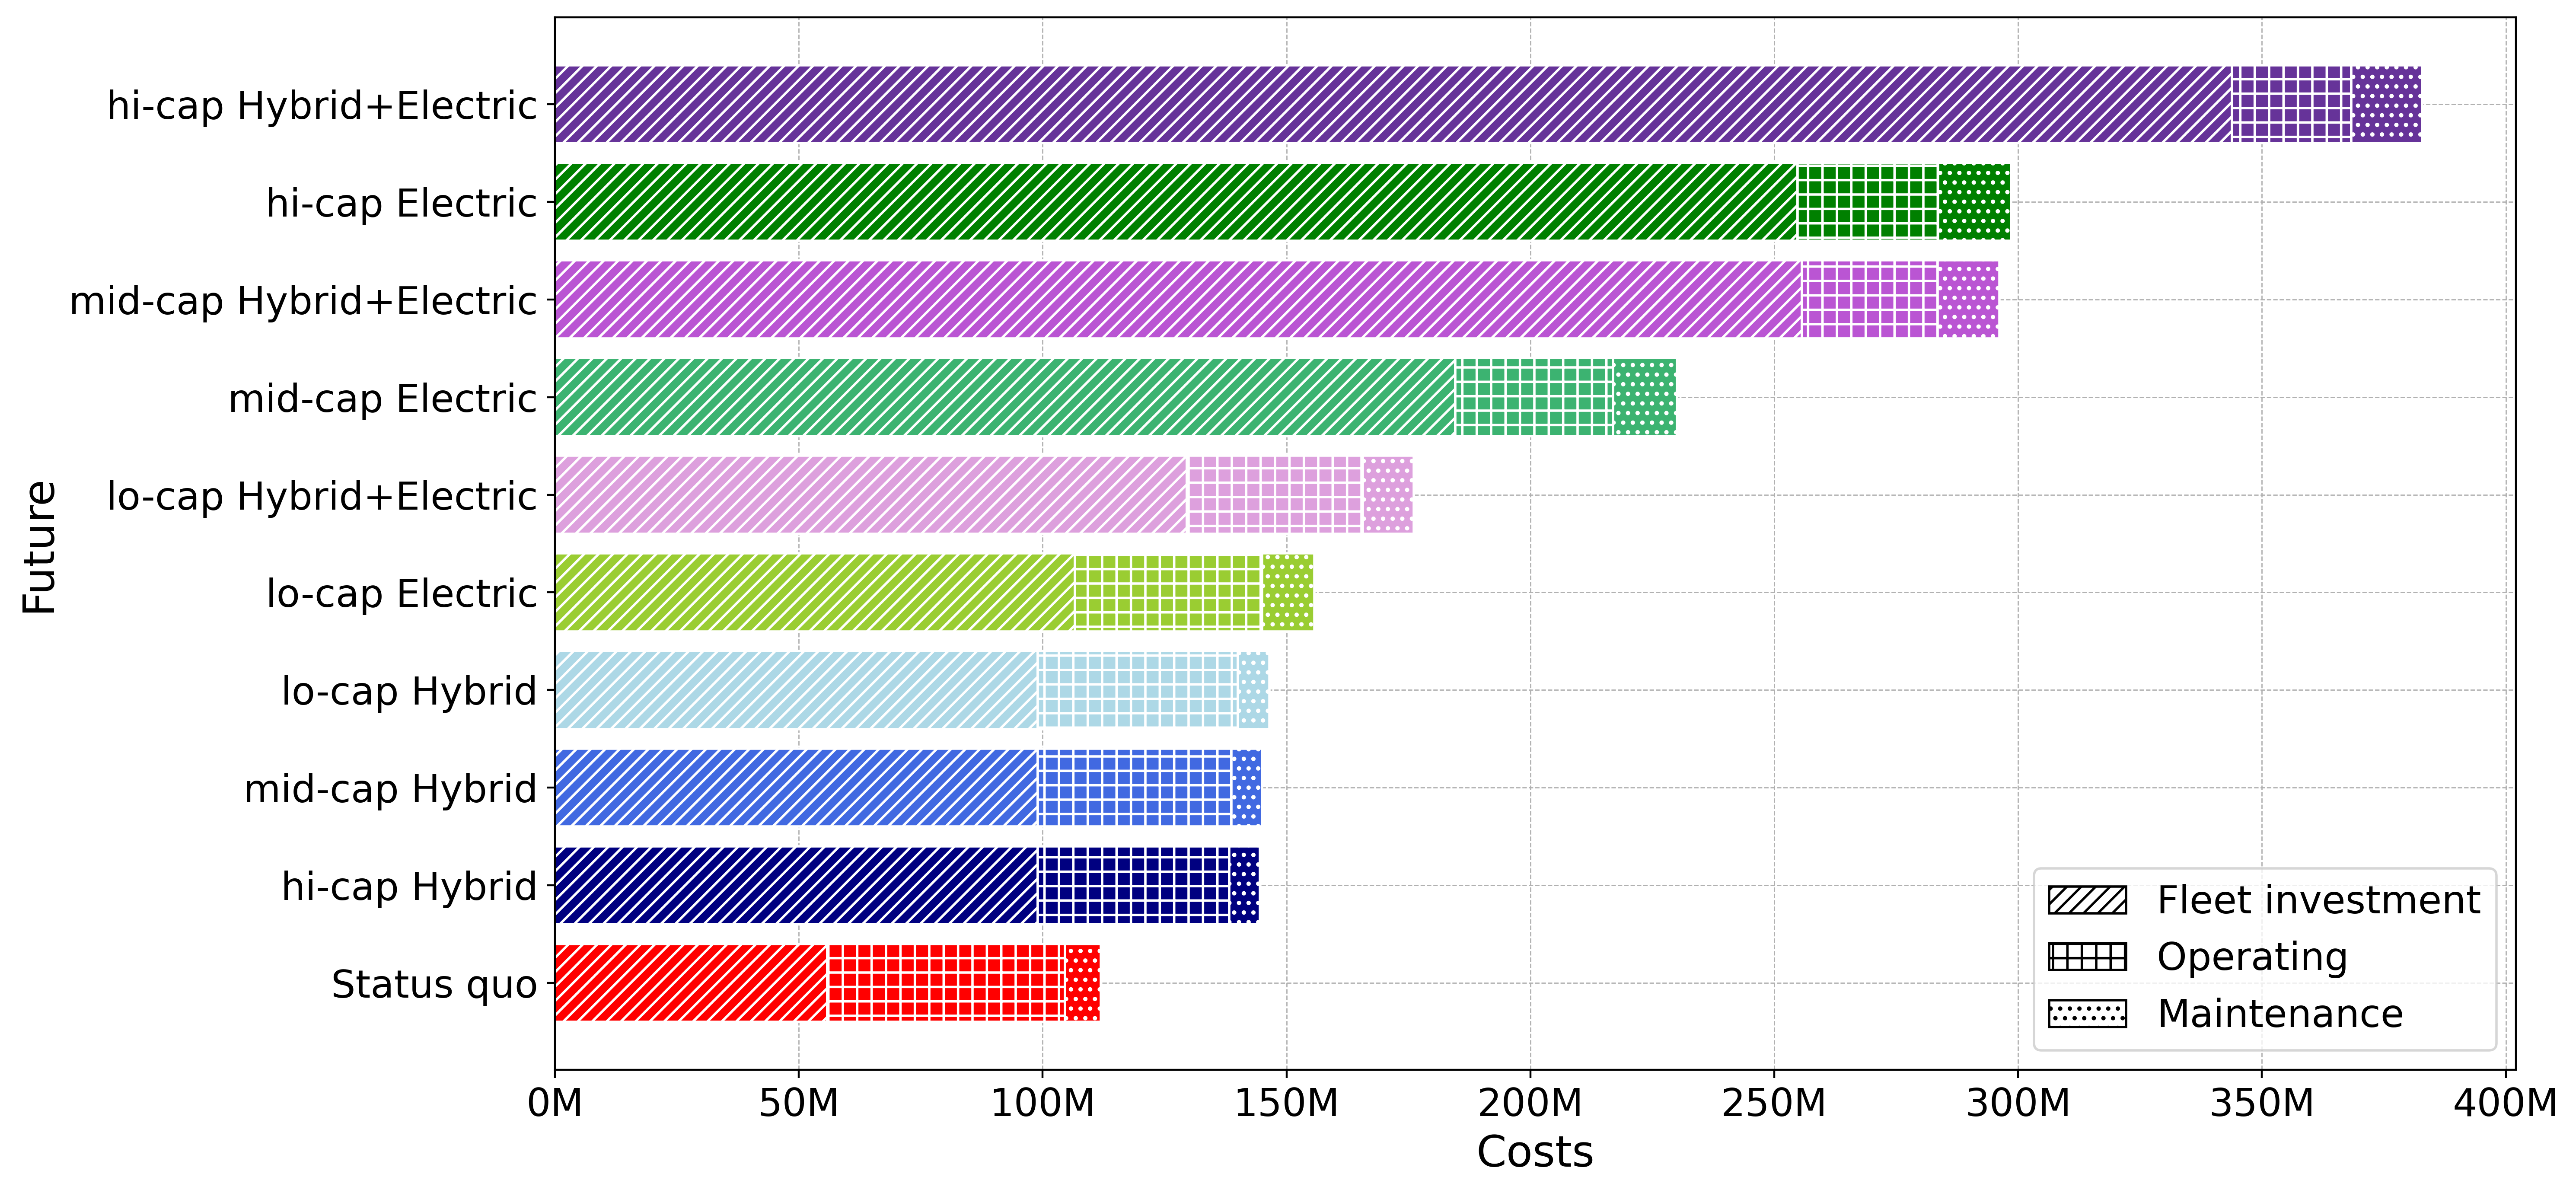

In [86]:
# Sort the grouped_df by total cost (operating + maintenance + fleet investment) in descending order
grouped_df['total_cost'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['fleet_investment']
grouped_df = grouped_df.sort_values(by='total_cost', ascending=True).reset_index(drop=True)

# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_height = 0.8  # Increased the thickness of the bars

# Create the plot
plt.figure(figsize=(15, 7), dpi=400)

# Plot the fleet investment costs with more discernible hatches (horizontal bars)
plt.barh(positions, grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Fleet investment Cost', height=bar_height, hatch='////', edgecolor='white')

# Plot the operating costs with more discernible hatches (stacked on top of fleet investment)
plt.barh(positions, grouped_df['operating_cost'], 
         left=grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Operating Cost', height=bar_height, hatch='++', edgecolor='white')

# Plot the maintenance costs with more discernible hatches (stacked on top of fleet investment and operating)
plt.barh(positions, grouped_df['maintenance_cost'], 
         left=grouped_df['fleet_investment'] + grouped_df['operating_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Maintenance Cost', height=bar_height, hatch='...', edgecolor='white')

# Add titles and labels
plt.ylabel('Future', fontsize=18)  # Increased font size of y-axis labels
plt.xlabel('Costs', fontsize=18)   # Removed "(Million USD)" from the x-axis label

# Update plt.yticks to improve label alignment for the categories
plt.yticks(positions, grouped_df['future'], fontsize=16)  # Increased font size of y-axis labels
plt.xticks(fontsize=16)

# Format x-axis to show values in million USD with the M symbol
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in the legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='////', label='Fleet investment'),
                   Patch(facecolor='white', edgecolor='black', hatch='++', label='Operating'),
                   Patch(facecolor='white', edgecolor='black', hatch='...', label='Maintenance')]

plt.legend(handles=legend_elements, title='', fontsize=16, title_fontsize=26, loc='lower right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy-horizontal.png', dpi=400)
plt.show()


In [87]:
grouped_df

future  operating_cost  maintenance_cost  \
0               Status quo       48.743818          7.430357   
1            hi-cap Hybrid       39.241050          6.292500   
2           mid-cap Hybrid       39.684878          6.333214   
3            lo-cap Hybrid       41.034559          6.453214   
4          lo-cap Electric       38.401536         10.752857   
5   lo-cap Hybrid+Electric       36.025885         10.508929   
6         mid-cap Electric       32.383420         13.124286   
7  mid-cap Hybrid+Electric       27.763219         12.719643   
8          hi-cap Electric       28.779221         14.971429   
9   hi-cap Hybrid+Electric       24.394584         14.599643   

   fleet_investment  total_cost  
0              55.8  111.974175  
1              99.0  144.533550  
2              99.0  145.018092  
3              99.0  146.487773  
4             106.6  155.754393  
5             129.6  176.134814  
6             184.6  230.107705  
7             255.7  296.182861  
8             254.8  298.550649  
9             343.9  382.894226

In [88]:
sq_cost = grouped_df['total_cost'].loc[grouped_df['future'] == 'Status quo'].iloc[0]
grouped_df['total_cost_relative_to_SQ']= grouped_df['total_cost']-sq_cost

In [89]:
grouped_df

future  operating_cost  maintenance_cost  \
0               Status quo       48.743818          7.430357   
1            hi-cap Hybrid       39.241050          6.292500   
2           mid-cap Hybrid       39.684878          6.333214   
3            lo-cap Hybrid       41.034559          6.453214   
4          lo-cap Electric       38.401536         10.752857   
5   lo-cap Hybrid+Electric       36.025885         10.508929   
6         mid-cap Electric       32.383420         13.124286   
7  mid-cap Hybrid+Electric       27.763219         12.719643   
8          hi-cap Electric       28.779221         14.971429   
9   hi-cap Hybrid+Electric       24.394584         14.599643   

   fleet_investment  total_cost  total_cost_relative_to_SQ  
0              55.8  111.974175                   0.000000  
1              99.0  144.533550                  32.559375  
2              99.0  145.018092                  33.043917  
3              99.0  146.487773                  34.513598  
4             106.6  155.754393                  43.780218  
5             129.6  176.134814                  64.160639  
6             184.6  230.107705                 118.133530  
7             255.7  296.182861                 184.208686  
8             254.8  298.550649                 186.576474  
9             343.9  382.894226                 270.920051